In [3]:
#import modules
import argparse
import os
import random
import numpy as np
from tkinter.tix import IMAGE
import dataset
import modules
import train


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from glob import glob

from PIL import Image

# Device
CUDA_DEVICE_NUM = 0
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)
print(torch.cuda.is_available())

# Hyperparameters
LEARNING_RATE = 0.0001
ROOTLOC = "\ISIC"
TRAINDATA = "ISIC\ISIC-2017_Training_Data\ISIC-2017_Training_Data"
TESTDATA = "ISIC\ISIC-2017_Test_v2_Data\ISIC-2017_Test_v2_Data"
VALIDDATA = "ISIC\ISIC-2017_Validation_Data\ISIC-2017_Validation_Data"
TRAINTRUTH = "ISIC\ISIC-2017_Training_Part1_GroundTruth\ISIC-2017_Training_Part1_GroundTruth"
TESTTRUTH = "ISIC\ISIC-2017_Test_v2_Part1_GroundTruth\ISIC-2017_Test_v2_Part1_GroundTruth"
VALIDTRUTH = "ISIC\ISIC-2017_Validation_Part1_GroundTruth\ISIC-2017_Validation_Part1_GroundTruth"

NUM_EPOCHS = 5
BATCH_SIZE = 4
WORKERS = 4


Device: cuda:0
True


In [4]:

train_dataset = dataset.CustomDataset(image_dir = TRAINDATA,
                                mask_dir=TRAINTRUTH,
                                transform=transforms.Compose([
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()]))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)

valid_dataset = dataset.CustomDataset(image_dir = VALIDDATA,
                                mask_dir=VALIDTRUTH,
                                transform=transforms.Compose([
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()]))

valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)

test_dataset = dataset.CustomDataset(image_dir = TESTDATA,
                                mask_dir=TESTTRUTH,
                                transform=transforms.Compose([
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()]))

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)



print(enumerate(train_dataloader))
print(len(train_dataloader))
print(len(test_dataloader))
print(len(train_dataset))
print(len(test_dataset))





500
150
2000
600


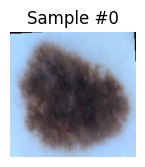

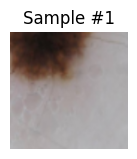

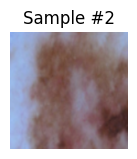

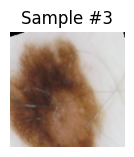

In [5]:

for i, sample in enumerate(train_dataset):
    #print(sample)
    image = sample['image']
    mask = sample['mask']

    #print(i, sample['image'].shape, sample['mask'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    #image = image.numpy()
    image = np.array(image)
    #print("image:", image.shape)
    #print(type(image))
    image = np.transpose(image, (1, 2, 0))

    plt.imshow(image)
    plt.show()
    if i == 3:
        plt.show()
        break

TRAIN 

In [6]:
model = train.UNet(3,1,[64,128,256,512]) 
model = model.to(DEVICE)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, 
                            momentum = 0.9, weight_decay = 5e-4)

total_steps = len(train_dataloader)
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr = LEARNING_RATE, 
#                                steps_per_epoch = total_steps, epochs = NUM_EPOCHS)
print(total_steps)

model.train()
print("> Training") 
print(enumerate(train_dataloader))
print(train_dataloader)





500
> Training


In [1]:
for epoch in range(NUM_EPOCHS):
    print("EPOCH:",epoch)
    for i, batch in enumerate(train_dataloader):
        images = batch['image']
        masks = batch['mask']
        #print(images.shape)
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)
        #print(images.shape)
        outputs = model(images)
        #print(1,outputs)
        #print(2,masks)
        loss = criterion(outputs, masks)
        #print(i)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.5f}')
        #scheduler.step()
            modules.save_predictions_as_imgs(train_dataloader,model)
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

loaded_model = train.UNet(3,1,[64,128,256,512]) 
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()


print("Training took " +  " secs")
print("> Testing")

NameError: name 'NUM_EPOCHS' is not defined

In [ ]:
loaded_model = train.UNet(3,1,[64,128,256,512]) 
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()
